(517, 14) (517,)
loss = 169.139959
accuracy = 0.514507
loss = 157.624355
accuracy = 0.535783
loss = 147.160559
accuracy = 0.555126
loss = 138.490450
accuracy = 0.580271
loss = 130.678507
accuracy = 0.599613
loss = 123.658200
accuracy = 0.624758
loss = 117.657710
accuracy = 0.642166
loss = 112.530012
accuracy = 0.661509
loss = 207.754812
accuracy = 0.537572
loss = 201.626250
accuracy = 0.537572
loss = 195.920635
accuracy = 0.537572
loss = 190.482144
accuracy = 0.549133
loss = 185.448114
accuracy = 0.560694
loss = 180.563532
accuracy = 0.583815
loss = 175.794499
accuracy = 0.595376
loss = 171.099450
accuracy = 0.618497


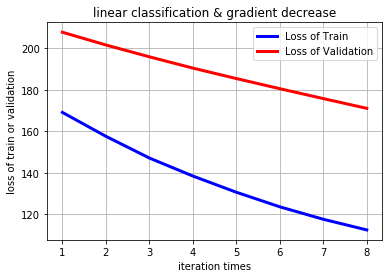

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split

def loadDataset():
    # 读取数据
    X,y=load_svmlight_file("D:\\machine learning\experiment\data\Australian_scale.txt")
    #将稀疏矩阵转化为完整特征矩阵
    X = X.todense()
    # 将数据集切分为训练集和验证集 
    X_train, X_validation, y_train, y_validation = train_test_split(X, y, random_state=0)
    print(X_train.shape,y_train.shape)
    return X_train, X_validation, y_train, y_validation

def gradientDescent(alpha,maxCycles,X_data,y_data):
    num = y_data.shape[0]    #样本数量
    # 线性模型参数正态分布初始化
    w = np.random.normal(size=(X_data.shape[1]))
    b = np.random.normal(size=1)
    losses = []
    tv = 0 
    ''' #选择合适的阈值
	# cat_truth = np.zeros(num)
	# cat = np.zeros(num)
	# for i in range(num):
	# 	if y_data[i] > tv :
	# 		cat_truth[i] = 1    #大于阈值的标记为正类
	# 	else: cat_truth[i] = -1    #小于阈值的标记为正类
    '''
    # 迭代次maxCycles次
    for n in range(maxCycles):
	    grad_w = np.ones(X_data.shape[1])*(np.linalg.norm(w,ord=2))
	    grad_b = np.zeros(1)
	    loss = np.power(np.linalg.norm(w,ord=2),2) / 2    #求w的第二范式
	    error = 0
	    C = np.power(2,7)
	    for i in range(num):
	    	y = np.dot( X_data[i][0].getA()[0], w ) + b
	    	if y_data[i] * y < 1:
	    		loss += C * max(0,1 - y_data[i] * y) / num
	    		grad_w += - C * y_data[i] * X_data[i][0].getA()[0] / num
	    		grad_b += - C * y_data[i] / num
	    	if y > tv :
	    		y = 1    #标记为正类
	    	else: y = -1    #标记为负类
	    	if not y == y_data[i]:
	    		error += 1
	    # 更新模型参数
	    w -= alpha * grad_w
	    b -= alpha * grad_b
	    losses.append(loss)
	    print("loss = %f" % loss)
	    print("accuracy = %f" % (1-error/num))
    return losses

def plotLossPerTime(n,losses_train,losses_validation):
    plt.xlabel('iteration times')
    plt.ylabel('loss of train or validation')
    plt.title('linear classification & gradient decrease')
    n_cycles = range(1, n+1)
    plt.plot(n_cycles, losses_train, label = "Loss of Train", color='blue', linewidth=3)
    plt.plot(n_cycles, losses_validation, label = "Loss of Validation", color='red', linewidth=3)
    plt.legend(loc=0)
    plt.grid()
    plt.show()


# main
X_train, X_validation, y_train, y_validation = loadDataset()
alpha = 0.001
maxCycles = 8
losses_train = gradientDescent(alpha, maxCycles, X_train, y_train)
losses_validation = gradientDescent(alpha, maxCycles, X_validation, y_validation)
plotLossPerTime(maxCycles, losses_train, losses_validation)